In [1]:
%matplotlib inline

In [2]:
import matplotlib.pylab as plt
import csv
import numpy as np
import pandas as pd
import os
import seaborn as sn
from os.path import join
sn.set_context('talk')
import pickle
from matplotlib import gridspec

In [3]:
dats = pickle.load(open(join('perf', 'example_dat.dill'), 'rb'))

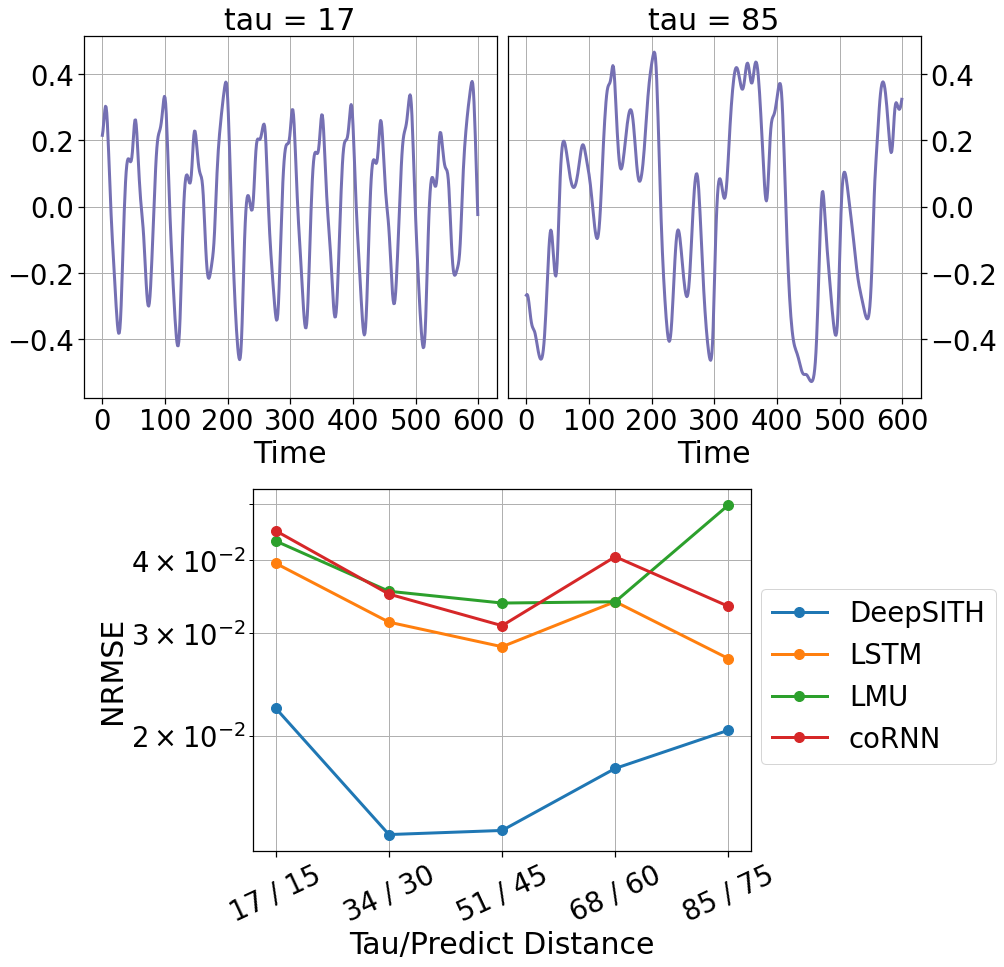

In [4]:
linew=3
markers = 10
with sn.plotting_context("notebook", font_scale=2.5):
    
    
    fig = plt.figure(figsize=(15,15))
    spec = gridspec.GridSpec(nrows=2, ncols=10, hspace=.25, wspace=.15, 
                              figure=fig)
    ax = fig.add_subplot(spec[1, 2:8])
    
    #DEEPSITH
    dat = pd.read_csv(join('perf','mackeyglass_deepsith_ratio_1.csv'))
    dat.columns
    gb = dat.groupby('tau')['last_test']
    ax.plot(gb.min(), '-o', markersize=markers,
            lw=linew)
    #LSTM
    dat = pd.read_csv(join('perf','mackeyglass_lstm_ratio_1.csv'))
    dat.columns
    gb = dat.groupby('tau')['last_test']
    ax.plot(gb.min(), '-o',markersize=markers,
            lw=linew)
    #LMU
    dat = pd.read_csv(join('perf','mackeyglass_lmu_ratio_2.csv'))
    dat.columns
    gb = dat.groupby('tau')['last_test']
    ax.plot([17, 17*2, 17*3, 17*4, 17*5],
            gb.min()[:-1].tolist() + [.0498], '-o',markersize=markers,
            lw=linew)
    #coRNN
    dat = pd.read_csv(join('perf','mackeyglass_coRNN_ratio_1.csv'))
    dat.columns
    gb = dat.groupby('tau')['last_test']
    #ax.yaxis.tick_right()
    #ax.yaxis.set_label_position("right")
    ax.grid(which='both')
    ax.plot(gb.min(), '-o',markersize=markers,
            lw=linew)
    ax.set_yscale('log')
    #ax.set_ylim(0, .05)
    ax.set_ylabel('NRMSE')
    ax.set_xlabel('Tau/Predict Distance')
    ax.set_xticks([17, 17*2, 17*3, 17*4, 17*5])
    ax.set_xticklabels(["{} / {}".format(17, 15), 
                        "{} / {}".format(17*2, 15*2),
                        "{} / {}".format(17*3, 15*3),
                        "{} / {}".format(17*4, 15*4),
                        "{} / {}".format(17*5, 15*5)],
                       )
    plt.legend(["DeepSITH", "LSTM", "LMU","coRNN"],
               loc=[1.02,.24])
    plt.xticks(rotation=25)
    
    
    
    ax = fig.add_subplot(spec[0, :5])

    ax.set_title("tau = 17")
    ax.set_xlabel('Time')
    #ax.set_ylabel(r'$ y(t) - x(t)$')
    #ax.set_yticks([],[])
    #ax.set_xticks([],[])
    dat = dats[0]
    ax.grid()

    #ax.scatter(dat[0][0, :600, 0].detach().cpu(), 
    #                dat[1][0, :600, 0].detach().cpu()-dat[0][0, :600, 0].detach().cpu(), s=8, alpha=0.7,
    #                    c=np.arange(dat[0][0, :600, 0].detach().cpu().shape[0]), cmap=sn.cubehelix_palette(as_cmap=True))
    ax.plot(dat[0][0, 600:1200, 0].detach().cpu(),
            lw=linew, color='#7570b3')

    ax = fig.add_subplot(spec[0, 5:], sharey=ax)
    ax.set_title("tau = 85")
    ax.set_xlabel('Time')
    ax.set_ylabel(r'')
    ax.yaxis.tick_right()
    #ax.set_yticks([],)
    #ax.set_xticks([],)

    ax.grid()

    dat = dats[2]
    #ax.scatter(dat[0][0, :600, 0].detach().cpu(), 
    #                dat[1][0, :600, 0].detach().cpu()-dat[0][0, :600, 0].detach().cpu(), s=8, alpha=0.7,
    #                    c=np.arange(dat[0][0, :600, 0].detach().cpu().shape[0]), cmap=sn.cubehelix_palette(as_cmap=True))
    ax.plot(dat[0][0, 600:1200, 0].detach().cpu(), 
            lw=linew, color='#7570b3')
    ax.yaxis.set_label_position("right")
    
    plt.savefig('mackey_glass_test_inc.pdf',
                #bbox='tight',
                edgecolor=fig.get_edgecolor(),
                facecolor=fig.get_facecolor(),
                dpi=150
                )
    plt.savefig('mackey_glass_test_inc.svg',
                #bbox='tight',
                edgecolor=fig.get_edgecolor(),
                facecolor=fig.get_facecolor(),
                dpi=150
                )